In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
data = pd.read_csv('dataset/Mall_Customers.csv')

In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
# Select relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

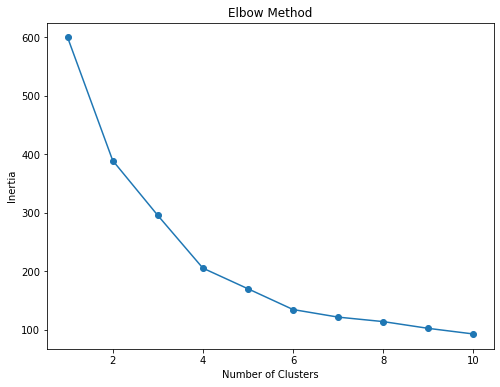

In [9]:
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
# Based on the elbow method, choose an optimal number of clusters (e.g., 5)
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [11]:
# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


In [15]:
# Compute the silhouette score
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.40846873777345605


In [16]:
# Compute the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.8889693268899006


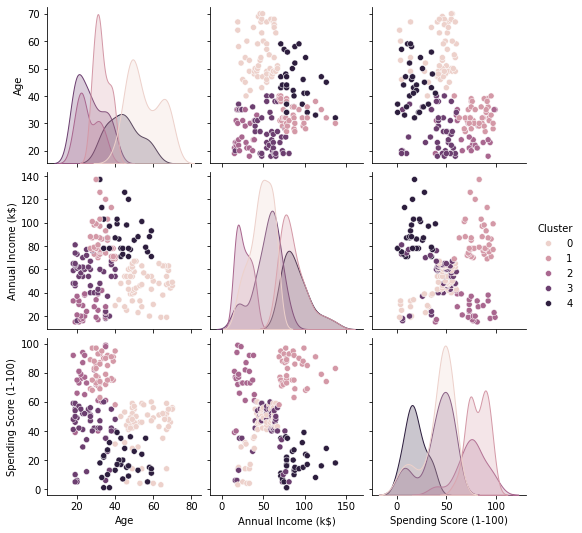

In [12]:
# Visualize the clusters using pairplot
sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

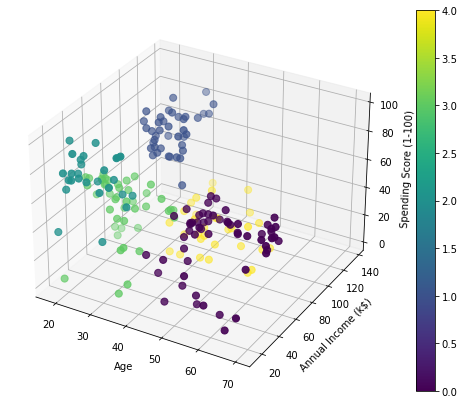

In [13]:
# 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                c=data['Cluster'], s=50, cmap='viridis')

plt.colorbar(sc)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [17]:
# Analyzing the characteristics of each cluster
for i in range(optimal_clusters):
    print(f'Cluster {i}')
    print(data[data['Cluster'] == i].describe())
    print('\n')

Cluster 0
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   58.000000  58.000000           58.000000               58.000000   
mean    68.775862  55.275862           47.620690               41.706897   
std     31.021805   8.571256           13.413567               15.697814   
min      9.000000  40.000000           19.000000                3.000000   
25%     45.500000  49.000000           39.250000               37.250000   
50%     69.500000  53.000000           48.500000               46.000000   
75%     92.500000  63.750000           59.750000               52.000000   
max    120.000000  70.000000           67.000000               60.000000   

       Cluster  
count     58.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  


Cluster 1
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    40.00000  40.000000           40.000000               4